# 2.Financial Product Analysis

## 1. Fixed Deposit Analysis

In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# two type of investment cumulative and non cumulative and input required is investment amount, interest rate, frequency, year

def maturity_amount(irpa,frequency,tenor,investment):
    maturity_value=np.fv(irpa/frequency,frequency*tenor,0,-investment)
    print('maturity amount will be Rs ', round(maturity_value,2))
    print('you have earned interst Rs',round(maturity_value-investment,2))

def periodic_int(irpa,frequency,tenor,investment):
    periodic_interest=investment*(irpa/frequency)
    total_interest=periodic_interest*tenor*frequency
    
    print('interest paid every period is ', periodic_interest)
    print('total interst paid on your investment will be: ', total_interest)

In [21]:
maturity_amount(0.07,1,5,500000)

maturity amount will be Rs  701275.87
you have earned interst Rs 201275.87
interest paid every period is  35000.0


<ipython-input-20-abe17b89d05f>:4: DeprecationWarning: numpy.fv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.fv instead (https://pypi.org/project/numpy-financial/).
  maturity_value=np.fv(irpa/frequency,frequency*tenor,0,-investment)


In [35]:
mv=[]
ir=[0.05,0.06,0.07,0.08]
for i in ir:
    maturity_amount(i,1,5,500000)
    mv.append(maturity_amount)


maturity amount will be Rs  638140.78
you have earned interst Rs 138140.78
maturity amount will be Rs  669112.79
you have earned interst Rs 169112.79
maturity amount will be Rs  701275.87
you have earned interst Rs 201275.87
maturity amount will be Rs  734664.04
you have earned interst Rs 234664.04


<ipython-input-34-61cb3cbfc557>:4: DeprecationWarning: numpy.fv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.fv instead (https://pypi.org/project/numpy-financial/).
  maturity_value=np.fv(irpa/frequency,frequency*tenor,0,-investment)


In [30]:
periodic_int(0.07,2,5,500000)

interest paid every period is  17500.0
total interst paid on your investment will be:  175000.0


<ipython-input-43-c0e50c5862c0>:7: DeprecationWarning: numpy.fv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.fv instead (https://pypi.org/project/numpy-financial/).
  maturity_value=np.fv(i/frequency,frequency*tenor,0,-investment)


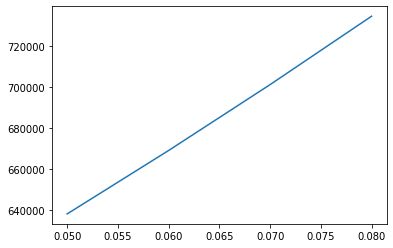

In [43]:
mv=[]
ir=[0.05,0.06,0.07,0.08]
frequency=1
tenor=5
investment=500000
for i in ir:
    maturity_value=np.fv(i/frequency,frequency*tenor,0,-investment)
    mv.append(maturity_value)
plt.plot(ir,mv)

## 2.Loan Schedule

In [50]:
# input required: loan amount, due at end, tenor, interest rate, frequency (12 monthly)

def emi(loan,ir,tenor,frequency,due):
    emi_amount=np.pmt(ir/frequency,tenor*frequency,-loan,fv=due)
    print('your Emi amount will be: Rs ', round(emi_amount,2))

In [52]:
emi(500000,0.11,2,12,0)

your Emi amount will be: Rs  23303.92


<ipython-input-50-603dda3feb73>:4: DeprecationWarning: numpy.pmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pmt instead (https://pypi.org/project/numpy-financial/).
  emi_amount=np.pmt(ir/frequency,tenor*frequency,-loan,fv=due)


In [196]:
months=[]
interest=[]
balance=[]
principle=[]
def emi1(loan,ir,tenor,frequency,due):
    emi_amount=np.pmt(ir/frequency,tenor*frequency,-loan,fv=due)
    print('your Emi amount will be: Rs ', round(emi_amount,2))
    
    for i in range((tenor*frequency)+1):
        
        if i==0:
            interest_amount=0
            interest.append(interest_amount)
            balance_amount=loan
            balance.append(balance_amount)
            principle_amount=0
            principle.append(principle_amount)
            month=i
            months.append(month)
        else:
            month=i
            months.append(month)
            interest_amount=round(balance[i-1]*ir/frequency,2)
            interest.append(interest_amount)
            principle_amount=round(emi_amount-interest_amount,2)
            principle.append(principle_amount)
            balance_amount=round(balance[i-1]-principle_amount,2)
            balance.append(balance_amount)
     
    cl_name=['month','interest','principle','balance']
    sch=pd.DataFrame(np.array([months,interest,principle,balance]),index=cl_name).T
    return sch

In [197]:
emi1(500000,0.11,2,12,100)

your Emi amount will be: Rs  23300.17


<ipython-input-196-22bd6594a249>:6: DeprecationWarning: numpy.pmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pmt instead (https://pypi.org/project/numpy-financial/).
  emi_amount=np.pmt(ir/frequency,tenor*frequency,-loan,fv=due)


,month,interest,principle,balance
0,0.0,0.00,0.00,500000.00
1,1.0,4583.33,18716.84,481283.16
2,2.0,4411.76,18888.41,462394.75
3,3.0,4238.62,19061.55,443333.20
4,4.0,4063.89,19236.28,424096.92
5,5.0,3887.56,19412.61,404684.31
6,6.0,3709.61,19590.56,385093.75
7,7.0,3530.03,19770.14,365323.61
8,8.0,3348.80,19951.37,345372.24
9,9.0,3165.91,20134.26,325237.98


## 3. Equity Analysis 
### fundmental Analysis

In [199]:
import yfinance as yf

In [274]:
tcs=yf.Ticker('TCS.NS')

In [208]:
tcs.info

{'zip': '400001',
 'sector': 'Technology',
 'fullTimeEmployees': 469261,
 'longBusinessSummary': 'Tata Consultancy Services Limited provides information technology (IT) and IT enabled services worldwide. It operates through Banking, Financial Services and Insurance; Manufacturing; Retail and Consumer Business; Communication, Media and Technology; and Others segments. The company offers CHROMA, a cloud-based talent management solution; ignio, a cognitive automation software product; iON, an assessment platform; TAP, a procurement offering; TCS MasterCraft, a platform to automate and manage IT processes; and Quartz, a blockchain solution. It also provides customer intelligence and insight solutions to deliver retail, banking, and communications experiences; Intelligent Urban Exchange, an integrated software to accelerate smart city programs; OPTUMERA, a digital merchandising suite; TCS BaNCS, a financial platform; and Jile, an agile DevOps product. In addition, the company offers advance

In [212]:
hd=tcs.history( period='36mo',interval='1d')

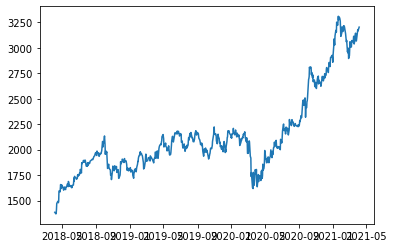

In [214]:
plt.plot(hd['Close'])

In [220]:
ed=tcs.financials

In [225]:
ed.dropna()

,2020-03-31,2019-03-31,2018-03-31,2017-03-31
Income Before Tax,422480000000.0,415630000000.0,340920000000.0,345130000000.0
Minority Interest,6230000000.0,4530000000.0,4020000000.0,3660000000.0
Net Income,323400000000.0,314720000000.0,258260000000.0,262890000000.0
Selling General Administrative,27020000000.0,42620000000.0,39380000000.0,36850000000.0
Gross Profit,690920000000.0,659470000000.0,540080000000.0,535370000000.0
Ebit,385810000000.0,374560000000.0,305180000000.0,303410000000.0
Operating Income,385810000000.0,374560000000.0,305180000000.0,303410000000.0
Other Operating Expenses,242800000000.0,221730000000.0,175380000000.0,175240000000.0
Interest Expense,-9240000000.0,-1980000000.0,-520000000.0,-320000000.0
Income Tax Expense,98010000000.0,100010000000.0,82120000000.0,81560000000.0


In [226]:
bs=tcs.balancesheet

In [228]:
bs.fillna(0)

,2020-03-31,2019-03-31,2018-03-31,2017-03-31
Intangible Assets,2.830000e+09,1.790000e+09,1.200000e+08,4.700000e+08
Total Liab,3.615000e+11,2.504400e+11,2.076600e+11,1.667200e+11
Total Stockholder Equity,8.412600e+11,8.944600e+11,8.512800e+11,8.621400e+11
Minority Interest,6.230000e+09,4.530000e+09,4.020000e+09,3.660000e+09
Deferred Long Term Liab,2.860000e+09,1.740000e+09,9.500000e+08,0.000000e+00
Other Current Liab,9.520000e+10,7.629000e+10,5.801000e+10,4.778000e+10
Total Assets,1.208990e+12,1.149430e+12,1.062960e+12,1.032520e+12
Common Stock,3.750000e+09,3.750000e+09,1.910000e+09,1.970000e+09
Other Current Assets,1.837000e+10,1.891000e+10,1.318000e+10,1.620000e+10
Retained Earnings,8.080600e+11,8.688900e+11,8.301400e+11,8.193500e+11


## 4. Insurance Product

In [243]:
amt=[]
def insurance_return(premium,term,ppt,maturity):
    for i in range(1,term+1):
        if i<=ppt:
            amount=premium
            amt.append(-amount)
        elif i<term:
            amt.append(0)
        else:
            amt.append(maturity)
    irr=np.irr(amt)
    return 'your policy expected return will be: {} %'.format(round(irr*100,2)) , amt
        
    

In [244]:
insurance_return(50000,20,6,600000)

<ipython-input-243-c256ae39f643>:11: DeprecationWarning: numpy.irr is deprecated and will be removed from NumPy 1.20. Use numpy_financial.irr instead (https://pypi.org/project/numpy-financial/).
  irr=np.irr(amt)


('your policy expected return will be: 4.27 %',
 [-50000,
  -50000,
  -50000,
  -50000,
  -50000,
  -50000,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  600000])

## 5. Mutual fund SIP

In [267]:
def sip_term(sip_amount,rr,frequency,maturity):
    net_period=np.nper(rr/frequency,-sip_amount,0,fv=maturity)
    months=np.round(net_period,0)
    years=months/12
    print('to reach expected amount have to invest for {} months or {} years'.format(months,years))
    print(months)

In [268]:
sip_term(2500,0.12,12,50000)

to reach expected amount have to invest for 18.0 months or 1.5 years
18.0


<ipython-input-267-4a836f976022>:2: DeprecationWarning: numpy.nper is deprecated and will be removed from NumPy 1.20. Use numpy_financial.nper instead (https://pypi.org/project/numpy-financial/).
  net_period=np.nper(rr/frequency,-sip_amount,0,fv=maturity)


In [289]:
nifty=yf.Ticker('^NSEI')

In [290]:
nifty=nifty.history(period='36mo',interval='1d')

In [291]:
nifty=nifty['Close']
tcs=hd['Close']

In [294]:
New_data=pd.concat([nifty,tcs],axis=1)

In [296]:
New_data.cov()

,Close,Close
Close,1.810571e+06,464055.01931
Close,4.640550e+05,169023.78275


In [297]:
sd=nifty.std()

In [298]:
sd

1345.5746391862424

In [301]:
beta=464055/sd**2

In [302]:
beta

0.25630310653586597

In [308]:
itc=yf.Ticker('ITC.NS')

In [313]:
idc=itc.history(period='1d',interval='15m')